In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as npt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
tb_default = pd.read_csv('data/Default.csv', index_col=0)

tb_default['default_binary'] = tb_default['default'].apply(
    lambda x: 1 if x == "Yes" else 0)

In [4]:
tb_default.head()

,default,student,balance,income,default_binary
1,No,No,729.526495,44361.625074,0
2,No,Yes,817.180407,12106.134700,0
3,No,No,1073.549164,31767.138947,0
4,No,No,529.250605,35704.493935,0
5,No,No,785.655883,38463.495879,0


# Classification in ML

## Logistic Regression

<AxesSubplot:xlabel='balance', ylabel='income'>

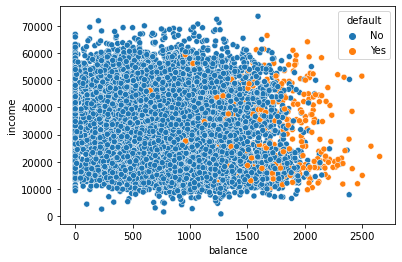

In [5]:
sns.scatterplot(data=tb_default,
                x='balance',
                y='income',
                hue='default',
                palette='tab10')

<AxesSubplot:xlabel='default', ylabel='income'>

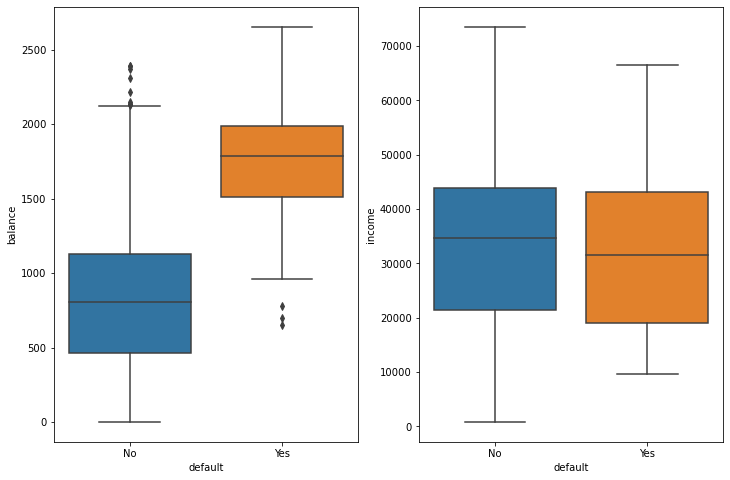

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(data=tb_default, x='default', y='balance', ax=ax[0])
sns.boxplot(data=tb_default, x='default', y='income', ax=ax[1])

<AxesSubplot:xlabel='balance', ylabel='default'>

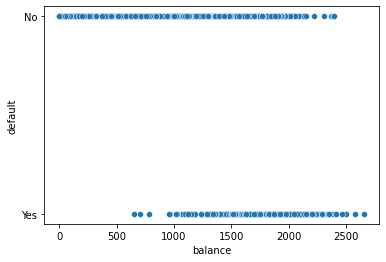

In [7]:
sns.scatterplot(data=tb_default, x='balance', y='default')

In [8]:
lr = LinearRegression()
lr.fit(X=tb_default[['balance']], y=tb_default['default_binary'])

LinearRegression()

In [9]:
tb_default['pred_lmfit'] = lr.predict(tb_default[['balance']])

<AxesSubplot:xlabel='balance', ylabel='default_binary'>

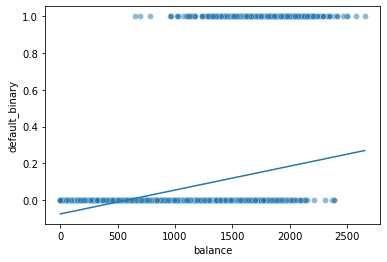

In [10]:
sns.scatterplot(data=tb_default, x='balance', y='default_binary', alpha = 0.5)
sns.lineplot(data=tb_default, x='balance', y='pred_lmfit')

- Predictions may be out of range.
- But yeah, the predictions will be ordered.
- Problem is - this approach cannot be extended to qualitative responses containing more than two levels.

# Logistic Regression

Rather than predicting the `target` directly, `logistic regression` tries to model the <b>`probability`</b> that your `target` belongs to a particular category.

Text(0.5, 1.0, 'Logistic Regression')

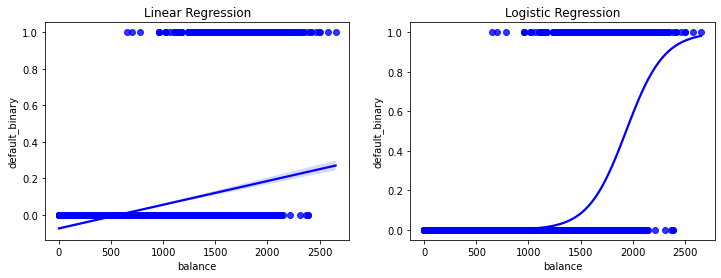

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot(data=tb_default,
            x='balance',
            y='default_binary',
            color='blue',
            ax=ax[0])
sns.regplot(data=tb_default,
            x='balance',
            y='default_binary',
            logistic=True,
            color='blue',
            ci=None,
            ax=ax[1])

ax[0].set_title('Linear Regression')
ax[1].set_title('Logistic Regression')

S-shaped curve.

log(p/(1-p))

$$ \frac{e^{x}}{(1+e^{x})} $$

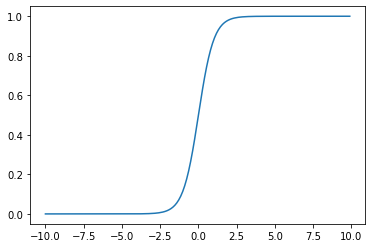

In [12]:
x = np.arange(-10, 10, 0.13)

plt.plot(x, np.exp(2*x)/(1 + np.exp(2*x)))


## Linear Regression
If we were to use a linear regression, the equation would be:

$$ y = P(default=Yes | balance) = a_0 + a_1\cdot balance $$

## Logistic Regression
The logistic regression seeks to model the probability in a better way:

$$ P(default=Yes | balance) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$



# In Python

In [13]:
tb_default.head()

,default,student,balance,income,default_binary,pred_lmfit
1,No,No,729.526495,44361.625074,0,0.019553
2,No,Yes,817.180407,12106.134700,0,0.030937
3,No,No,1073.549164,31767.138947,0,0.064232
4,No,No,529.250605,35704.493935,0,-0.006457
5,No,No,785.655883,38463.495879,0,0.026843


In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic = LogisticRegression()
logistic.fit(X=tb_default[['balance']], y=tb_default['default_binary'])

LogisticRegression()

In [16]:
logistic.predict_proba(tb_default[['balance']])

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [17]:
tb_default['pred_prob'] = logistic.predict_proba(tb_default[['balance']])[:,1]

In [ ]:
tb_default['default_binary']

<AxesSubplot:xlabel='balance', ylabel='pred_prob'>

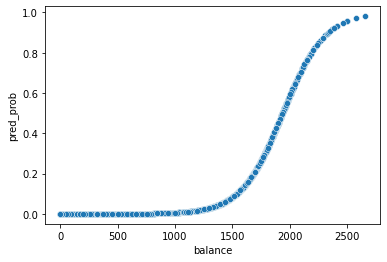

In [18]:
sns.scatterplot(data = tb_default, x = 'balance', y = 'pred_prob')

Como fazemos para ter uma previsão categórica, como nossa variável resposta? Utilizamos o conceito de **threshold**: utilizamos um valor de probabilidade pelo qual dividiremos as previsões - abaixo deste valor todas as previsões serão `False` acima, `True`.

Para classificação binária esse threshold é tipicamente 0.5.

In [19]:
tb_default['pred_binary_where'] = np.where(tb_default['pred_prob'] > 0.5, 1, 0)

In [21]:
sum(logistic.predict(tb_default[['balance']]))

142

In [22]:
tb_default['pred_binary'] = logistic.predict(tb_default[['balance']])

In [24]:
tb_default['pred_binary_where'] == tb_default['pred_binary']

1        True
2        True
3        True
4        True
5        True
         ... 
9996     True
9997     True
9998     True
9999     True
10000    True
Length: 10000, dtype: bool

<AxesSubplot:xlabel='balance', ylabel='pred_prob'>

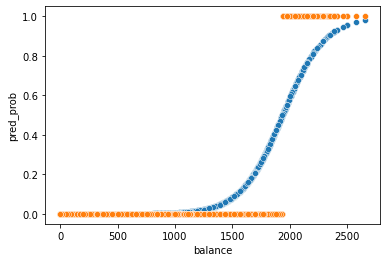

In [25]:
sns.scatterplot(data = tb_default, x = 'balance', y = 'pred_prob')
sns.scatterplot(data = tb_default, x = 'balance', y = 'pred_binary')

## Medindo o erro

In [27]:
tb_default['erro_binario'] = np.where(
    tb_default['pred_binary'] == tb_default['default_binary'], 0, 1)

In [28]:
sum(tb_default['erro_binario'])

275

In [31]:
1-sum(tb_default['erro_binario'])/len(tb_default['erro_binario'])

0.9725

In [32]:
logistic.score(tb_default[['balance']], tb_default['default_binary'])

0.9725

In [33]:
tb_default.groupby(['default_binary'])['erro_binario'].agg(['sum', 'count'])

,sum,count
default_binary,,
0,42,9667
1,233,333


A **acurácia** é uma métrica simples, direta e fácil de se explicar. No entanto, muitas vezes ela não é suficiente para comparar/avaliar modelos:

* Em problemas onde o **tamanho das duas classes é muito diferente** ela oculta a taxa de erro na classe minoritaria.
* Muitas vezes o **custo** de um falso positivo e um falso negativo não são equivalentes. No exemplo acima o custo de deixar de emprestar (custo de oportunidade) pode ser muito diferente do custo de calote.

Podemos extender a avaliação de erro do modelo atrvés de **outras métricas** de erro que tratem dos diferentes problemas levantados acima. Primeiro, vamos analisar a curva ROC para entender melhor o trade-off que ocorre quando mudamos o threshold de classificação.

In [34]:
tb_erro = tb_default.groupby(['default_binary'])['erro_binario'].agg(['sum', 'count']).reset_index()
tb_erro.columns = ['valor_verdadeiro', 'erros', 'total']
tb_erro['acertos'] = tb_erro['total'] - tb_erro['erros']
tb_erro

,valor_verdadeiro,erros,total,acertos
0,0,42,9667,9625
1,1,233,333,100


A *taxa de positivos verdadeiros* (TPR, recall ou sensibilidade) é **100/333**, ou seja, o número de positivos que o modelo previu **corretamente** dividido pelo número de positivos total.

A *taxa de falsos positivos* (FPR ou fall-out) é **233/333**, ou seja, o número de positivos que o modelo previu **incorretamente** dividido pelo número de positivos total.

Existe um trade-off entre TPR e FPR: conforme aumento o threshold diminuo a FPR mas aumento a TPR (e vice-versa). A forma mais simples de visualizar este trade-off é através da curva ROC.

In [35]:
from sklearn.metrics import roc_curve

In [44]:
fpr, tpr, thresholds = roc_curve(y_true = (tb_default['default_binary'] -1) * -1,
                                 y_score = 1-tb_default['pred_prob'])

In [45]:
thresholds

array([1.99997633, 0.99997633, 0.99914537, 0.99914525, 0.99889882,
       0.99889848, 0.9982806 , 0.99827573, 0.99540198, 0.99539956,
       0.99534095, 0.99534053, 0.99533831, 0.9953343 , 0.99383204,
       0.99381691, 0.99336259, 0.99335661, 0.99327771, 0.99326864,
       0.99171479, 0.99171199, 0.99012929, 0.99012381, 0.98994146,
       0.98994054, 0.9892388 , 0.9892385 , 0.98901771, 0.98900964,
       0.98899165, 0.98898593, 0.98860801, 0.98858603, 0.98799079,
       0.98798841, 0.98742067, 0.98741178, 0.98583048, 0.98582673,
       0.98573609, 0.9857297 , 0.98547778, 0.98546427, 0.98483872,
       0.98482377, 0.97955332, 0.97954205, 0.97951011, 0.97946962,
       0.97908516, 0.97907677, 0.97840991, 0.97839798, 0.97658129,
       0.97655759, 0.97419492, 0.97419253, 0.97400767, 0.97395336,
       0.97252342, 0.97252146, 0.97250015, 0.97239787, 0.97195693,
       0.97192403, 0.97034829, 0.97033576, 0.96825116, 0.96823721,
       0.96752824, 0.96750923, 0.96722688, 0.96721078, 0.96702

Text(0.5, 0.98, 'Curva de FPR/TPR por Threshold')

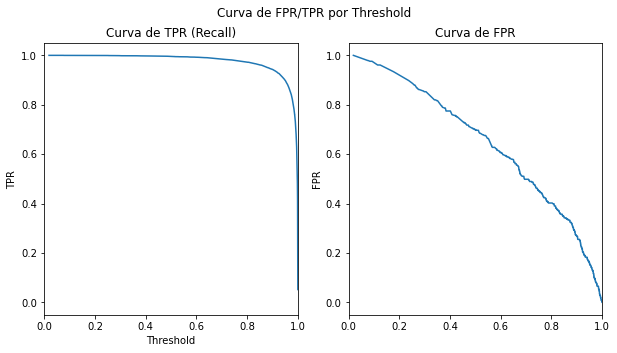

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(thresholds, tpr)
ax[0].set_title('Curva de TPR (Recall)')
ax[0].set_xlim([0, 1])
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('TPR')
ax[1].plot(thresholds, fpr)
ax[1].set_title('Curva de FPR')
ax[1].set_xlim([0, 1])
ax[1].set_ylabel('FPR')
fig.suptitle('Curva de FPR/TPR por Threshold')

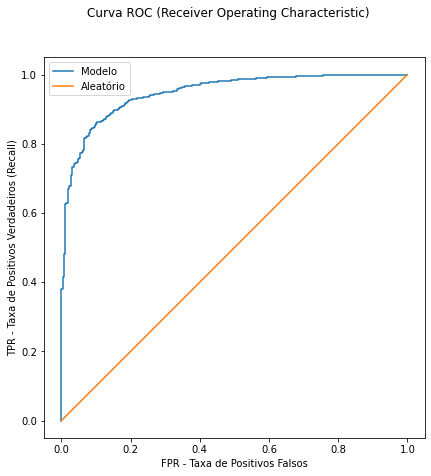

In [47]:
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(fpr, tpr, label = 'Modelo')
ax.plot(fpr, fpr, label = 'Aleatório')
ax.set_xlabel('FPR - Taxa de Positivos Falsos')
ax.set_ylabel('TPR - Taxa de Positivos Verdadeiros (Recall)')
ax.set_aspect('equal')
plt.legend()
fig.suptitle('Curva ROC (Receiver Operating Characteristic)');

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_score = roc_auc_score(y_true=tb_default['default_binary'],
              y_score=tb_default['pred_prob'])
print(f"Área debaixo da Curva ROC: {round(roc_score, 2)}")

Área debaixo da Curva ROC: 0.95


Embora a curva ROC represente bem o impacto que a mudança de threshold tem sobre o erro de classificação ainda temos um problema: o desbalanceamento das classes. Assim como a acurácia, a curva ROC dá peso demais para as classificações negativas corretas (classe majoritaria), ocultando o erro sobre a classificação positiva (classe minoritaria).

Para consolidar a nossa avaliação do erro de previsão, precisamos ver ainda outra métrica, que lida melhor com problemas desbalanceados - a precisão. A precisão é a taxa entre o número de positivos verdadeiros e o número de positivos previstos.

In [50]:
tb_confusion = tb_default.groupby(['default_binary', 'pred_binary'])['pred_prob'].count().reset_index()

In [55]:
tb_confusion

,default_binary,pred_binary,pred_prob
0,0,0,9625
1,0,1,42
2,1,0,233
3,1,1,100


In [51]:
tb_confusion.pivot_table(columns='pred_binary', index='default_binary')

pred_prob     
pred_binary            0    1
default_binary               
0                   9625   42
1                    233  100

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_true = tb_default['default_binary'],
                 y_pred = tb_default['pred_binary'])

array([[9625,   42],
       [ 233,  100]])

In [56]:
precision = 100/(42 + 100)
recall = 100/(100+233)
print(f"Precisão: {precision} - Recall: {recall}")

Precisão: 0.704225352112676 - Recall: 0.3003003003003003


In [58]:
from sklearn.metrics import precision_recall_curve

In [59]:
prc, rec, thresh = precision_recall_curve(y_true=tb_default['default_binary'],
                                          probas_pred=tb_default['pred_prob'])

Text(0.5, 0.98, 'Curva de FPR/TPR por Threshold')

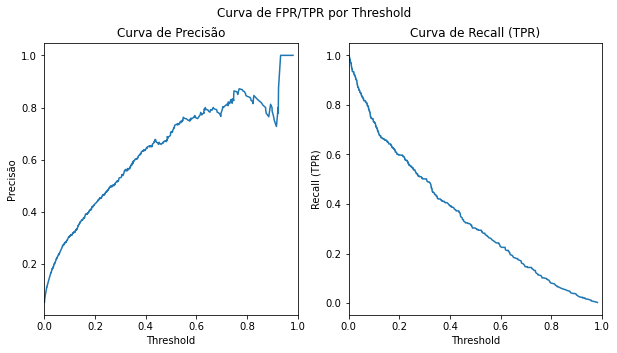

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].plot(thresh, prc[:-1])
ax[0].set_title('Curva de Precisão')
ax[0].set_xlim([0, 1])
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Precisão')
ax[1].plot(thresh, rec[:-1])
ax[1].set_title('Curva de Precisão')
ax[1].set_xlim([0, 1])
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Recall (TPR)')
fig.suptitle('Curva de FPR/TPR por Threshold')

Text(0.5, 0.98, 'Curva de FPR/TPR por Threshold')

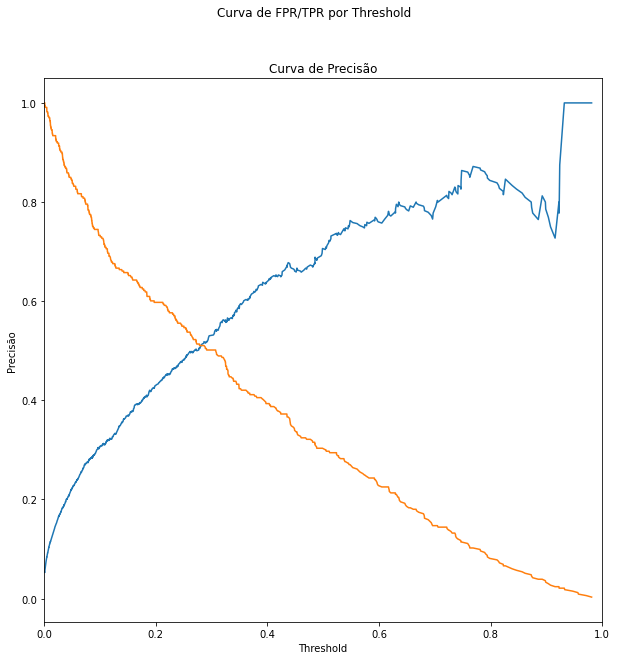

In [62]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(thresh, prc[:-1])
ax.plot(thresh, rec[:-1])
ax.set_title('Curva de Precisão')
ax.set_xlim([0, 1])
ax.set_xlabel('Threshold')
ax.set_ylabel('Precisão')
fig.suptitle('Curva de FPR/TPR por Threshold')

Text(0, 0.5, 'Precisão')

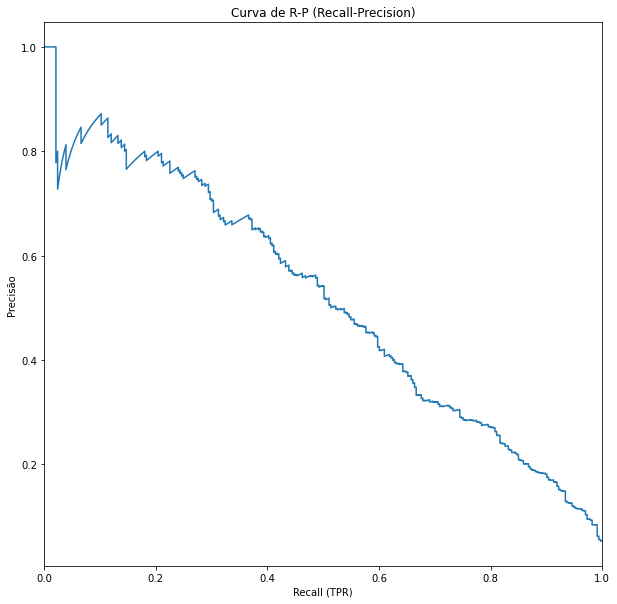

In [61]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(rec, prc)
ax.set_title('Curva de R-P (Recall-Precision)')
ax.set_xlim([0, 1])
ax.set_xlabel('Recall (TPR)')
ax.set_ylabel('Precisão')

In [63]:
f1 = 2 * (precision * recall)/(precision + recall)
print(f"F1-Score: {f1}")

F1-Score: 0.42105263157894746


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print(f1_score(y_true = tb_default['default_binary'],
             y_pred = tb_default['pred_binary']))

### Conclusão

#### Acurácia

**PROS**

* Fácil de explicar/entender;
* Medida direta, conversa diretamente com o que as pessoas imaginam ser o *erro do modelo*.

**CONTRAS**

* Não representa bem o erro em problemas de classes desbalanceadas.

**QUANDO USAR**

* Apenas em problemas balanceados;
* Quando as classes previstas não tem custo diferente.

#### Matriz de Confusão

**PROS**

* Fácil de explicar/entender;
* Permite a visualização de todos os erros do modelo.

**CONTRAS**

* Não é um indicador;
* Não permite a avaliação automatica de modelos.

**QUANDO USAR**

* Na fase exploratória de modelagem, para comparar diferentes versões iniciais do modelo. Sempre que estamos construindo os modelos manualmente e podemos analisar o resultado de cada um particularmente.

#### AUC-ROC (e Curva ROC)

**PROS**

* A curva ROC é uma boa representação do trade-off entre precisão e falsos positivos;
* O AUC-ROC score não é específico para um threshold, permitindo uma avaliação do score (a probabilidade prevista) do modelo.

**CONTRAS**

* O AUC-ROC score não representa bem o erro em problemas de classes desbalanceadas.

**QUANDO USAR**

* Na fase exploratória de modelagem, para comparar diferentes versões iniciais do modelo. Sempre que estamos construindo os modelos manualmente e podemos analisar o resultado de cada um particularmente;
* Em problemas de classes balanceadas.

#### F1-SCORE

**PROS**

* A medida padrão dentro da área de modelagem/ciência de dados. Qualquer outro analista/cientista de dados vai entender o que você está falando;
* A utilização da precisão torna o F1 um bom método para medir o erro em problemas desbalanceados.

**CONTRAS**

* Difícil de explicar (fora de *0 é ruim 1 é bom*)

**QUANDO USAR**

* Para comparar 2 ou mais modelos quantitativamente;
* Durante métodos de seleção de variáveis/técnicas automáticos.

In [67]:
from mlxtend.plotting import plot_decision_regions

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

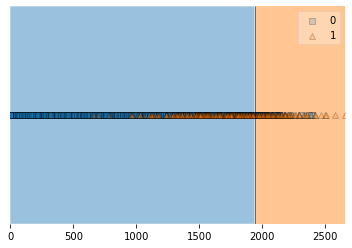

In [70]:
plot_decision_regions(np.array(tb_default[['balance']]), 
                      np.array(tb_default['default_binary']), 
                      logistic, scatter_kwargs={'alpha':0.2})

In [77]:
logistic_2 = LogisticRegression()
logistic_2.fit(np.array(tb_default[['balance', 'income']]), tb_default['default_binary'])

LogisticRegression()

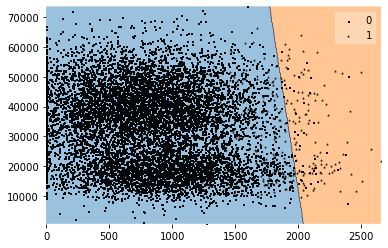

In [84]:
plot_decision_regions(np.array(tb_default[['balance', 'income']]), 
                      np.array(tb_default['default_binary']), 
                      logistic_2, scatter_kwargs={'alpha':1, 's' : 1});

<AxesSubplot:xlabel='balance', ylabel='income'>

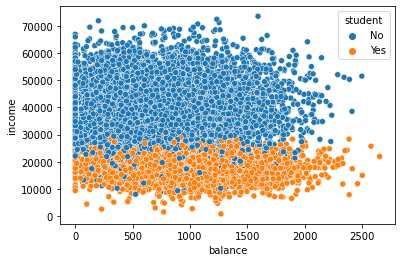

In [86]:
sns.scatterplot(data = tb_default, x= 'balance', y = 'income', hue = 'student')

In [88]:
tb_default.groupby(['student', 'default'])['default_binary'].count()

student  default
No       No         6850
         Yes         206
Yes      No         2817
         Yes         127
Name: default_binary, dtype: int64

In [89]:
tb_default['e_estudante'] = np.where(tb_default['student'] == 'Yes', 1,0)

In [91]:
logistic_3 = LogisticRegression()
logistic_3.fit(tb_default[['e_estudante', 'income', 'balance']], tb_default['default_binary'])

LogisticRegression()

In [94]:
tb_default['pred_log3'] = logistic_3.predict_proba(tb_default[['e_estudante', 'income', 'balance']])[:,-1]

<AxesSubplot:xlabel='e_estudante', ylabel='pred_log3'>

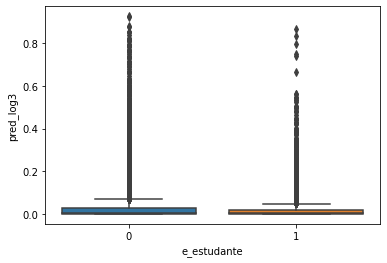

In [95]:
sns.boxplot(data = tb_default, x = 'e_estudante', y= 'pred_log3')

In [96]:
tb_default.groupby('student')['pred_log3'].describe()

,count,mean,std,min,25%,50%,75%,max
student,,,,,,,,
No,7056.0,0.041931,0.104589,0.000007,0.001094,0.005557,0.028800,0.926141
Yes,2944.0,0.030723,0.076631,0.000022,0.001328,0.005389,0.020541,0.865173


In [98]:
tb_default.groupby('student')[['balance', 'income']].mean()

,balance,income
student,,
No,771.770402,40011.952857
Yes,987.818239,17950.230775


In [99]:
tb_default.groupby('student')[['balance', 'income']].std()

,balance,income
student,,
No,469.674899,10010.288665
Yes,482.909690,4533.007954


# Interpretando o modelo

Primeiro, assim como na regressão, vamos normalizar as variáveis de entrada para termos uma interpretação do intercepto mais natural:

In [100]:
scaler = StandardScaler()
X = scaler.fit_transform(tb_default[['balance']])
y = tb_default['default_binary']

In [101]:
log_fit = LogisticRegression()
log_fit.fit(X, y)

LogisticRegression()

## Primeiro o intercepto

In [102]:
print(f"Intercepto: {log_fit.intercept_[0]}")

Intercepto: -6.010498751904213


O que isso significa?? Precisamos lembrar que a regressão logística projeta o logaritmo das chances (o chamado logit)

$$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$


$$ \left(\frac{P(default)}{1 - P(default)}\right) = e^{a_0 + a_1\cdot x}$$

In [103]:
np.exp(log_fit.intercept_[0])*1000

2.4528645044415556

Exponenciar o intercepto nos dá a **chance** (p/(1-p), não a probabilidade p) média de default:

In [104]:
intercepto = np.exp(log_fit.intercept_[0])*1000
print(f"Chance de default em com balance médio: {round(intercepto,2)}:1000")

Chance de default em com balance médio: 2.45:1000


## Depois os coeficientes

In [105]:
print(f"Coeficiente Balance: {log_fit.coef_[0][0]}")

Coeficiente Balance: 2.6302537698842596


In [106]:
np.exp(log_fit.coef_[0][0])

13.877291093879528

O coeficiente nos diz o quanto a variação de uma unidade de X impacta, multiplicativamente, a **chance** (de novo, não a probabilidade) de default. No caso acima vemos que:

In [107]:
impacto_1x = np.exp(log_fit.coef_[0][0])
print(f"Chance de default em +1 desvio padrão de X: {round(impacto_1x * intercepto,2)}:1000")

Chance de default em +1 desvio padrão de X: 34.04:1000


## O Problema de Chances

O problema das interpretações acima é que, a não ser que trabalhemos em uma casa de apostas, **chances não são facilmente interpretáveis**. Uma solução é criar um gráfico mostrando o **impacto da variação de X sobre a PROBABILIDADE**!

In [108]:
impacto_x = np.linspace(-2, 4, 100)

In [109]:
odds = np.exp(log_fit.intercept_[0] + impacto_x * log_fit.coef_[0][0])

In [110]:
log_fit.coef_[0][0]*2

5.260507539768519

In [111]:
probabilities = (odds/(1+odds))

In [112]:
tb_simul = pd.DataFrame({
    'impacto_x': impacto_x,
    'odds': odds,
    'prob': probabilities
})

<AxesSubplot:xlabel='impacto_x', ylabel='prob'>

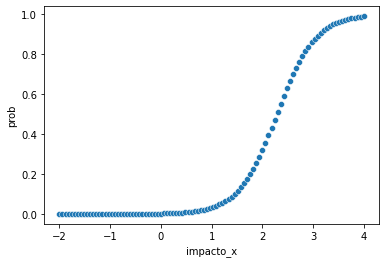

In [113]:
sns.scatterplot(data = tb_simul, x = 'impacto_x', y = 'prob')

In [114]:
tb_default['X'] = scaler.fit_transform(tb_default[['balance']])

In [115]:
tb_default['pred_prob'] = log_fit.predict_proba(tb_default[['X']])[:,-1]

/Users/pedroteche/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='pred_prob'>

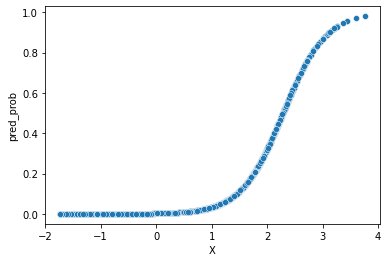

In [116]:
sns.scatterplot(data = tb_default, x = 'X', y = 'pred_prob')

## Modelo com mais coeficientes

In [125]:
scaler = StandardScaler()
#X = scaler.fit_transform(tb_default[['balance', 'income']])
X = tb_default[['balance', 'income']]
y = tb_default['default_binary']
log_fit2 = LogisticRegression()
log_fit2.fit(X, y)

LogisticRegression()

In [127]:
X.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [137]:
tb_default['pred_prob3'] = log_fit2.predict_proba(tb_default[['balance', 'income']])[:,1]

<AxesSubplot:xlabel='income', ylabel='pred_prob3'>

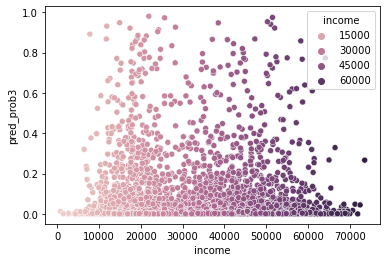

In [140]:
sns.scatterplot(data = tb_default, x = 'income', y = 'pred_prob3', hue = 'income')

In [128]:
impacto_bal = np.linspace(0, 6000, 100)

In [129]:
impacto_bal

array([   0.        ,   60.60606061,  121.21212121,  181.81818182,
        242.42424242,  303.03030303,  363.63636364,  424.24242424,
        484.84848485,  545.45454545,  606.06060606,  666.66666667,
        727.27272727,  787.87878788,  848.48484848,  909.09090909,
        969.6969697 , 1030.3030303 , 1090.90909091, 1151.51515152,
       1212.12121212, 1272.72727273, 1333.33333333, 1393.93939394,
       1454.54545455, 1515.15151515, 1575.75757576, 1636.36363636,
       1696.96969697, 1757.57575758, 1818.18181818, 1878.78787879,
       1939.39393939, 2000.        , 2060.60606061, 2121.21212121,
       2181.81818182, 2242.42424242, 2303.03030303, 2363.63636364,
       2424.24242424, 2484.84848485, 2545.45454545, 2606.06060606,
       2666.66666667, 2727.27272727, 2787.87878788, 2848.48484848,
       2909.09090909, 2969.6969697 , 3030.3030303 , 3090.90909091,
       3151.51515152, 3212.12121212, 3272.72727273, 3333.33333333,
       3393.93939394, 3454.54545455, 3515.15151515, 3575.75757

In [131]:
log_fit2.coef_[0][1]

2.0809198451258285e-05

In [130]:
log_fit2.coef_[0][0]

0.00564710796907506

In [132]:
tb_default.describe()

,balance,income,default_binary,pred_lmfit,pred_prob,pred_binary_where,pred_binary,erro_binario,e_estudante,pred_log3,X
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,835.374886,33516.981876,0.033300,0.033300,0.033300,0.014200,0.014200,0.027500,0.294400,0.038631,-9.847678e-17
std,483.714985,13336.639563,0.179428,0.062821,0.101570,0.118321,0.118321,0.163543,0.455795,0.097328,1.000050e+00
min,0.000000,771.967729,0.000000,-0.075192,0.000026,0.000000,0.000000,0.000000,0.000000,0.000007,-1.727085e+00
25%,481.731105,21340.462903,0.000000,-0.012628,0.000358,0.000000,0.000000,0.000000,0.000000,0.001152,-7.311361e-01
50%,823.636973,34552.644802,0.000000,0.031776,0.002296,0.000000,0.000000,0.000000,0.000000,0.005486,-2.426739e-02
75%,1166.308386,43807.729272,0.000000,0.076279,0.014616,0.000000,0.000000,0.000000,1.000000,0.025656,6.841840e-01
max,2654.322576,73554.233495,1.000000,0.269531,0.979781,1.000000,1.000000,1.000000,1.000000,0.926141,3.760559e+00


In [133]:
odds = np.exp(log_fit2.intercept_[0] + impacto_bal * log_fit2.coef_[0][0] + 33516 * log_fit2.coef_[0][1])

<AxesSubplot:xlabel='impacto_bal', ylabel='prob'>

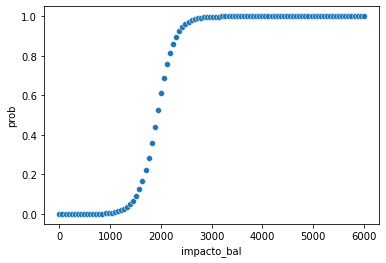

In [141]:
probabilities = (odds/(1+odds))
tb_simul = pd.DataFrame({
    'impacto_bal': impacto_bal,
    'odds': odds,
    'prob': probabilities
})
sns.scatterplot(data = tb_simul, x = 'impacto_bal', y = 'prob')

<AxesSubplot:xlabel='impacto_inc', ylabel='prob'>

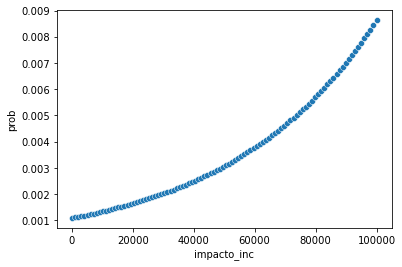

In [142]:
impacto_inc = np.linspace(100, 100000, 100)
odds = np.exp(log_fit2.intercept_[0] + 835 * log_fit2.coef_[0][0] + impacto_inc * log_fit2.coef_[0][1] )
probabilities = (odds/(1+odds))
tb_simul = pd.DataFrame({
    'impacto_inc': impacto_inc,
    'odds': odds,
    'prob': probabilities
})
sns.scatterplot(data = tb_simul, x = 'impacto_inc', y = 'prob')

# EXTRA - The Loss function of the Logistic Regression

What does the logistic regression tries to minimize? 

Intuitively, we want to assign more punishment when predicting 1 while the actual is 0 and when predict 0 while the actual is 1.

\begin{equation}
  Cost(\hat{p}, y_{obs}) =
    \begin{cases}
      -log(\hat{p}) & \text{if } y_{obs} = 1  \\
      -log(1-\hat{p}) & \text{if } y_{obs} = 0\\
    \end{cases}       
\end{equation}



$$Cost(\hat{p}, y_{obs}) = -y_{obs} \cdot log(\hat{p}) - (1 - y_{obs})\cdot log(1-\hat{p})$$

$\hat{p}$ is my estimated probability, and $y_{obs}$ is the label of my observation.

So let's understand what this `cost function` represents:
- Imagine I have an observation whose true default label is 0 ($y_{obs}$ = 0) and my model predicts that the probability of its value being 1 (default) is 80%. We would have:
    
    - $cost(0.8, 0) = -0 \cdot log(0.8) - 1 \cdot log(1-0.8) = -log(0.2) \approx 1.6$

Now if we say that the probability of it being 1 is 90%:
- $cost(0.9, 0) = -0 \cdot log(0.9) - 1 \cdot log(1-0.9) = -log(0.1) \approx 2.3$

Now if we say that the probability of it being 1 is 95%:
- $cost(0.95, 0) = -0 \cdot log(0.95) - 1 \cdot log(1-0.95) = -log(0.05) \approx 3$

In [ ]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12,4))
y_obs = 0
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[0].plot(p, cost)

y_obs = 1
p = np.arange(0.01, 1, 0.01)
cost = -y_obs * np.log(p) - (1-y_obs) * np.log(1-p)
ax[1].plot(p, cost)

ax[0].set_title('$y_{true}$ = 0')
ax[1].set_title('$y_{true}$ = 1')

ax[0].set_ylabel('Cost')

ax[0].set_xlabel('Probability of y = 1')
ax[1].set_xlabel('Probability of y = 1')

Thus, it penalizes when you are sure it is one, but you are wrong. Or it penalizes when you are sure it is zero, but you are wrong, the true label is one.

So this is what logistic regression tries to minimize. Two important summaries:

- The results of the logistic regression are <b>probabilities</b> of being the label 1.
- As it minimizes that cost function, <b>you can be very confident of observations predicted with probabilities close to 1 or close to 0</b>. They will probably not be wrong because your model tried to avoid it during training.

## Odds - the chances

$$ P(default) = \frac{e^{a_0 + a_1\cdot x}}{1 + e^{a_0 + a_1\cdot x}}$$


$$ \left(\frac{P(default)}{1 - P(default)}\right) = e^{a_0 + a_1\cdot x}$$

1 in 5 people is a fraudster.

P = 1/5 = 0.2

Odds = $\frac{0.2}{0.8} = 1/4 = 0.25$

Odds: $\frac{\text{favorable events}}{\text{unfavorable events}}$, Probability: $\frac{\text{favorable events}}{\text{total events}}$

## Log Odds

$$ log\left(\frac{P(default)}{1 - P(default)}\right) = a_0 + a_1x$$

Remember that for **Linear Regression**, the value a_1, the coefficient, can be understood as how much of our target change if we change 1 unit in `x`. That is, if we change 1 in `x`, our target changes by $a_1$

For **Logistic Regression**, though, increasing X by one unit affects the **log odds** in $a_1$. So, although increasing `x` indeed increases the probability P, the value it will increase depends on X.
